In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn.linear_model import HuberRegressor

In [38]:
subset = "wikitext"

In [61]:
df = pd.read_csv(f'wandb_export_{subset}.csv')
df

,Step,Group: k_is_10 - test-tokens/avg_loss,Group: k_is_10 - test-tokens/avg_loss__MIN,Group: k_is_10 - test-tokens/avg_loss__MAX,Group: k_is_9 - test-tokens/avg_loss,Group: k_is_9 - test-tokens/avg_loss__MIN,Group: k_is_9 - test-tokens/avg_loss__MAX,Group: k_is_8 - test-tokens/avg_loss,Group: k_is_8 - test-tokens/avg_loss__MIN,Group: k_is_8 - test-tokens/avg_loss__MAX,...,Group: k_is_4 - test-tokens/avg_loss__MAX,Group: k_is_3 - test-tokens/avg_loss,Group: k_is_3 - test-tokens/avg_loss__MIN,Group: k_is_3 - test-tokens/avg_loss__MAX,Group: k_is_2 - test-tokens/avg_loss,Group: k_is_2 - test-tokens/avg_loss__MIN,Group: k_is_2 - test-tokens/avg_loss__MAX,Group: k_is_1 - test-tokens/avg_loss,Group: k_is_1 - test-tokens/avg_loss__MIN,Group: k_is_1 - test-tokens/avg_loss__MAX
0,204800,7.953187,7.953187,7.953187,8.081332,8.081332,8.081332,8.109540,8.109540,8.109540,...,8.692308,9.161002,9.161002,9.161002,9.281194,9.281194,9.281194,9.923136,9.923136,9.923136
1,409600,7.538690,7.538690,7.538690,7.587398,7.587398,7.587398,7.566676,7.566676,7.566676,...,7.730587,8.112595,8.112595,8.112595,8.149853,8.149853,8.149853,8.945701,8.945701,8.945701
2,614400,7.408750,7.408750,7.408750,7.448263,7.448263,7.448263,7.451177,7.451177,7.451177,...,7.535055,7.656546,7.656546,7.656546,7.642898,7.642898,7.642898,8.209473,8.209473,8.209473
3,819200,7.283301,7.283301,7.283301,7.313699,7.313699,7.313699,7.340992,7.340992,7.340992,...,7.445716,7.518245,7.518245,7.518245,7.512648,7.512648,7.512648,7.792551,7.792551,7.792551
4,1024000,7.156657,7.156657,7.156657,7.202709,7.202709,7.202709,7.237005,7.237005,7.237005,...,7.372444,7.436201,7.436201,7.436201,7.483259,7.483259,7.483259,7.617212,7.617212,7.617212
5,1228800,7.088344,7.088344,7.088344,7.110209,7.110209,7.110209,7.122344,7.122344,7.122344,...,7.261786,7.363234,7.363234,7.363234,7.383091,7.383091,7.383091,7.543132,7.543132,7.543132
6,1433600,7.013278,7.013278,7.013278,7.030483,7.030483,7.030483,7.051396,7.051396,7.051396,...,7.216582,7.309884,7.309884,7.309884,7.310712,7.310712,7.310712,7.489626,7.489626,7.489626
7,1638400,6.909443,6.909443,6.909443,6.959909,6.959909,6.959909,6.953560,6.953560,6.953560,...,7.135991,7.236579,7.236579,7.236579,7.248999,7.248999,7.248999,7.456785,7.456785,7.456785
8,1843200,6.869742,6.869742,6.869742,6.907643,6.907643,6.907643,6.892666,6.892666,6.892666,...,7.049801,7.180477,7.180477,7.180477,7.210966,7.210966,7.210966,7.404471,7.404471,7.404471
9,2048000,6.793430,6.793430,6.793430,6.826206,6.826206,6.826206,6.852335,6.852335,6.852335,...,7.007751,7.116654,7.116654,7.116654,7.167747,7.167747,7.167747,7.352110,7.352110,7.352110


In [62]:
substrings = ["MAX", "MIN"]
keep_cols = [col for col in df.columns 
             if not any(sub in col for sub in substrings)]
df = df.loc[:, keep_cols]

rename_dict = {
    "Group: k_is_1 - test-tokens/avg_loss": 49152, 
    "Group: k_is_2 - test-tokens/avg_loss": 331776,
    "Group: k_is_3 - test-tokens/avg_loss": 552960,
    "Group: k_is_4 - test-tokens/avg_loss": 1376256,
    "Group: k_is_5 - test-tokens/avg_loss": 1769472,
    "Group: k_is_6 - test-tokens/avg_loss": 3379200,
    "Group: k_is_7 - test-tokens/avg_loss": 39993600,
    "Group: k_is_8 - test-tokens/avg_loss": 8847360,
    "Group: k_is_9 - test-tokens/avg_loss": 10027008,
    "Group: k_is_10 - test-tokens/avg_loss": 15253504,  
}
df=df.rename(columns=rename_dict)
df

,Step,15253504,10027008,8847360,39993600,3379200,1769472,1376256,552960,331776,49152
0,204800,7.953187,8.081332,8.109540,8.335725,8.322264,8.777195,8.692308,9.161002,9.281194,9.923136
1,409600,7.538690,7.587398,7.566676,7.594973,7.611318,7.766294,7.730587,8.112595,8.149853,8.945701
2,614400,7.408750,7.448263,7.451177,7.465980,7.439063,7.567952,7.535055,7.656546,7.642898,8.209473
3,819200,7.283301,7.313699,7.340992,7.395598,7.362668,7.450904,7.445716,7.518245,7.512648,7.792551
4,1024000,7.156657,7.202709,7.237005,7.279338,7.258744,7.380099,7.372444,7.436201,7.483259,7.617212
5,1228800,7.088344,7.110209,7.122344,7.214775,7.188667,7.286452,7.261786,7.363234,7.383091,7.543132
6,1433600,7.013278,7.030483,7.051396,7.114408,7.092212,7.215527,7.216582,7.309884,7.310712,7.489626
7,1638400,6.909443,6.959909,6.953560,7.020139,7.030921,7.105827,7.135991,7.236579,7.248999,7.456785
8,1843200,6.869742,6.907643,6.892666,6.931370,6.976628,7.070060,7.049801,7.180477,7.210966,7.404471
9,2048000,6.793430,6.826206,6.852335,6.922431,6.926591,7.012914,7.007751,7.116654,7.167747,7.352110


In [76]:
datapoints = []
for index, row in df.iterrows():
    tokens = 512*8*row['Step']
    for col_name in df.drop('Step', axis=1).columns:
        datapoints.append({'tokens': int(tokens), 'parameters': int(col_name), 'loss': float(row[col_name])})
print(datapoints)

[{'tokens': 838860800, 'parameters': 15253504, 'loss': 7.953187465667725}, {'tokens': 838860800, 'parameters': 10027008, 'loss': 8.081331853866578}, {'tokens': 838860800, 'parameters': 8847360, 'loss': 8.109540128707886}, {'tokens': 838860800, 'parameters': 39993600, 'loss': 8.335725212097168}, {'tokens': 838860800, 'parameters': 3379200, 'loss': 8.322263851165772}, {'tokens': 838860800, 'parameters': 1769472, 'loss': 8.777195091247558}, {'tokens': 838860800, 'parameters': 1376256, 'loss': 8.692308387756349}, {'tokens': 838860800, 'parameters': 552960, 'loss': 9.16100206375122}, {'tokens': 838860800, 'parameters': 331776, 'loss': 9.281193523406982}, {'tokens': 838860800, 'parameters': 49152, 'loss': 9.923136081695556}, {'tokens': 1677721600, 'parameters': 15253504, 'loss': 7.538689622879028}, {'tokens': 1677721600, 'parameters': 10027008, 'loss': 7.58739785194397}, {'tokens': 1677721600, 'parameters': 8847360, 'loss': 7.566675586700439}, {'tokens': 1677721600, 'parameters': 39993600, '

In [84]:
def graph(datapoints, 
          x_key, 
          y_key, 
          colors_key, 
          x_label, 
          y_label, 
          legend_label,
          x_scale=None, 
          y_scale=None,
          save_file=None
         ): 
    unique_colors = sorted(list(set([x[colors_key] for x in datapoints])))
    sorted_datapoints = sorted(datapoints, key=lambda x: x[x_key])
    for color in unique_colors:
        xs = [x[x_key] for x in sorted_datapoints if x[colors_key]==color]
        ys = [x[y_key] for x in sorted_datapoints if x[colors_key]==color]
    
        plt.plot(xs, ys, label="{:.2e}".format(color))
    
    plt.xscale(x_scale)
    plt.yscale(y_scale)
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title=legend_label)

    
    if save_file:
        plt.savefig(save_file, bbox_inches='tight')
    plt.show()  

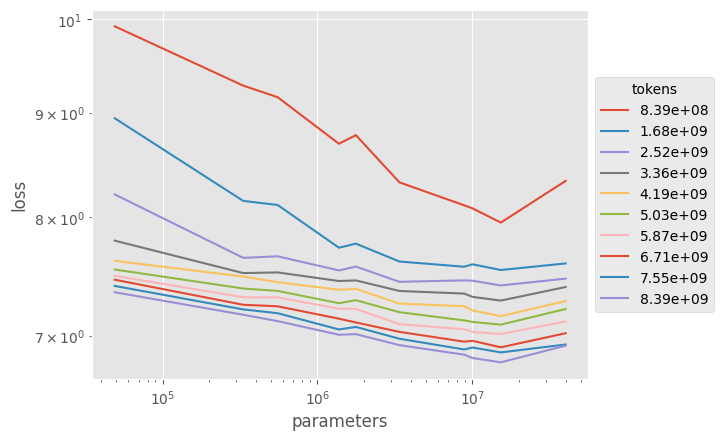

In [85]:
graph(datapoints, x_key='parameters', y_key='loss', colors_key='tokens', 
     x_label="parameters", y_label="loss", legend_label='tokens', x_scale='log', y_scale='log')

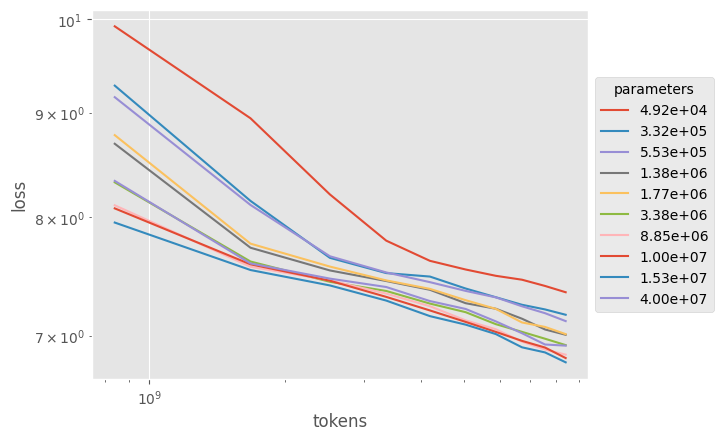

In [86]:
graph(datapoints, x_key='tokens', y_key='loss', colors_key='parameters', 
     x_label="tokens", y_label="loss", legend_label='parameters', x_scale='log', y_scale='log')